# Van der Pol equiation

$$
u'' = \mu(1 - u^2) u' - u
$$
$$
u(0) = 2, u'(0) = 0
$$

Van der Pol equiation as system

$$
u' = v
$$
$$
v' = \mu(1 - u^2)v - u
$$
$$
u(0) = 2, v(0) = 0
$$

In [45]:
from rk_methods import *
from imex_methods import *
from measure import*
from order_estimate import *

mu1 = 0.5
mu2 = 10
mu3 = 50

def f(mu, t, u):
    y0, y1 = u
    return np.asarray([y1, 0])

def g(mu, t, u):
    y0, y1 = u
    return np.asarray([0, mu * (1 - y0**2) * y1 - y0])

y_0 = [0, -0.2]

In [46]:
gamma = (3 + np.sqrt(3)) / 6

A = [[gamma, 0], [1 - 2 * gamma, gamma]]
b = [1/2, 1/2]
c = [gamma, 1 - gamma]
A_ = [[0, 0, 0], [gamma, 0, 0], [gamma - 1, 2*(1 - gamma), 0]]
b_ = [0, 1/2, 1/2]

In [ ]:
Tl = 0
Tr = 25
h_exact1, t_exact1, y_exact1 = IMEX(lambda t, u: f(mu1, t, u), ImplicitSolver(lambda t, u: g(mu1, t, u)), y_0, A, A_, b, b_, c, Tl, Tr, 2**18)
#h_exact1, t_exact1, y_exact1 = ERK(lambda t, u: f(mu1, t, u) + g(mu1, t, u), y_0, A_, b_, [0] + c, Tl, Tr, 2**15)
h_exact2, t_exact2, y_exact2 = IMEX(lambda t, u: f(mu2, t, u), ImplicitSolver(lambda t, u: g(mu2, t, u)), y_0, A, A_, b, b_, c, Tl, Tr, 2**18)
#h_exact2, t_exact2, y_exact2 = ERK(lambda t, u: f(mu2, t, u) + g(mu2, t, u), y_0, A_, b_, [0] + c, Tl, Tr, 2**15)
h_exact3, t_exact3, y_exact3 = IMEX(lambda t, u: f(mu3, t, u), ImplicitSolver(lambda t, u: g(mu3, t, u)), y_0, A, A_, b, b_, c, Tl, Tr, 2**18)
#h_exact3, t_exact3, y_exact3 = ERK(lambda t, u: f(mu3, t, u) + g(mu3, t, u), y_0, A_, b_, [0] + c, Tl, Tr, 2**15)

In [48]:
def f_exact(t, t_exact, y_exact):
    if isinstance(t, float) or isinstance(t, int):
        j = max(0, int((t - Tl) * (len(t_exact) - 1) / (Tr - Tl)))
        if not np.isclose(t_exact[j], t):
            j += 1
        return y_exact[j]

    return y_exact[::(len(y_exact) - 1) // (len(t) - 1)]

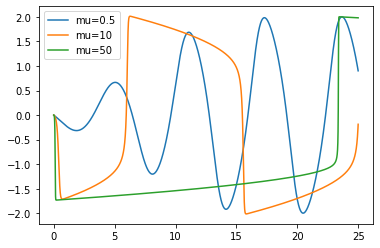

In [49]:
import matplotlib.pyplot as plt

plt.plot(t_exact1, y_exact1[:, 0], t_exact2, y_exact2[:, 0], t_exact3, y_exact3[:, 0])
plt.legend([f'mu={mu1}', f'mu={mu2}', f'mu={mu3}'])

In [50]:
table1 = create_mesasurement(lambda t, u: f(mu1, t, u), lambda t, u: g(mu1, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact1, y_exact1), [0.005], None, [2**11, 2**12, 2**13, 2**14, 2**15, 2**16], verbose=True)
table2 = create_mesasurement(lambda t, u: f(mu2, t, u), lambda t, u: g(mu2, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact2, y_exact2), [0.005], None, [2**11, 2**12, 2**13, 2**14, 2**15, 2**16], verbose=True)
table3 = create_mesasurement(lambda t, u: f(mu3, t, u), lambda t, u: g(mu3, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact3, y_exact3), [0.005], None, [2**11, 2**12, 2**13, 2**14, 2**15, 2**16], verbose=True)

from IPython.display import HTML, display
print(f'mu={mu1}')
display(HTML(table1))
print(f'mu={mu2}')
display(HTML(table2))
print(f'mu={mu3}')
display(HTML(table3))

Calculating for error: 0.005
Measuring method: ERK
Measuring method: IRK
Measuring method: IMEX
Calculating for error: 0.005
Measuring method: ERK
Measuring method: IRK
Measuring method: IMEX
Calculating for error: 0.005
Measuring method: ERK
Measuring method: IRK
Measuring method: IMEX
mu=0.5


Name,Exec time (s),Step Size,Error
ERK,0.19588,0.01221,0
IRK,0.72795,0.01221,1e-05
IMEX,0.38851,0.01221,2e-05


mu=10


Name,Exec time (s),Step Size,Error
ERK,0.57956,0.00153,0.00139
IRK,7.38975,0.00153,0.0022
IMEX,6.26569,0.00153,0.00445


mu=50


Name,Exec time (s),Step Size,Error
ERK,0.77201,0.00153,2.85589
IRK,6.7981,0.00153,4.36034
IMEX,5.15149,0.00153,9.09883


In [51]:
#order_result1 = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(lambda t, u: f(mu1, t, u), ImplicitSolver(lambda t, u: g(mu1, t, u)), y0, A, A_, b, b_, c, Tl, Tr, N), y_exact1[0], Tl, Tr, [2**13, 2**14, 2**15], 2**16)
# order_result2 = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(lambda t, u: f(mu2, t, u), ImplicitSolver(lambda t, u: g(mu2, t, u)), y0, A, A_, b, b_, c, Tl, Tr, N), y_exact2[0], Tl, Tr, [2**13, 2**14, 2**15], 2**16)
# order_result3 = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(lambda t, u: f(mu3, t, u), ImplicitSolver(lambda t, u: g(mu3, t, u)), y0, A, A_, b, b_, c, Tl, Tr, N), y_exact3[0], Tl, Tr, [2**13, 2**14, 2**15], 2**16)
print('Estimating order from fine grid:')
#print(f'Order result: {order_result1[0]}')
# print(f'Order result: {order_result2[0]}')
# print(f'Order result: {order_result3[0]}')

Estimating order from fine grid:
